<p style="font-size:300%; text-align:center"> king county housing price modeling</p>
<p style="font-size:150%; text-align:center"> Analysis</p>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium 
plt.style.use('ggplot')

##  Read the clean KC housing data

In [2]:
kc = pd.read_csv('data/kc_house_data_clean.csv')
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21398 entries, 0 to 21397
Data columns (total 21 columns):
id               21398 non-null int64
date             21398 non-null object
price            21398 non-null int64
bedrooms         21398 non-null int64
bathrooms        21398 non-null float64
sqft_living      21398 non-null float64
sqft_lot         21398 non-null float64
floors           21398 non-null float64
waterfront       21398 non-null float64
view             21398 non-null float64
condition        21398 non-null int64
grade            21398 non-null int64
sqft_above       21398 non-null float64
sqft_basement    21398 non-null float64
yr_built         21398 non-null int64
zipcode          21398 non-null int64
lat              21398 non-null float64
long             21398 non-null float64
sqft_living15    21398 non-null float64
sqft_lot15       21398 non-null float64
tot_bathrooms    21398 non-null float64
dtypes: float64(13), int64(7), object(1)
memory usage: 3.4+ MB


In [3]:
# looks like the data types have changed. 
kc['id'] = kc['id'].astype('int64') 
kc['date']= pd.to_datetime(kc['date']) 
kc['price'] = kc['price'].astype('int64') 
kc['bedrooms'] = kc['bedrooms'].astype('int64') 
kc['bathrooms'] = kc['bathrooms'].astype('float64') 
kc['sqft_living'] = kc['sqft_living'].astype('float64') 
kc['sqft_lot'] = kc['sqft_lot'].astype('float64') 
kc['floors'] = kc['floors'].astype('float64') 
kc['waterfront'] = kc['waterfront'].astype('float64') 
kc['view'] = kc['view'].astype('float64') 
kc['condition'] = kc['condition'].astype('int64') 
kc['grade'] = kc['grade'].astype('int64') 
kc['sqft_above'] = kc['sqft_above'].astype('float64') 
kc['yr_built'] = kc['yr_built'].astype('int64') 
kc['zipcode'] = kc['zipcode'].astype('int64') 
kc['lat'] = kc['lat'].astype('float64') 
kc['long'] = kc['long'].astype('float64') 
kc['sqft_living15'] = kc['sqft_living15'].astype('float64') 
kc['sqft_lot15'] = kc['sqft_lot15'].astype('float64')
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21398 entries, 0 to 21397
Data columns (total 21 columns):
id               21398 non-null int64
date             21398 non-null datetime64[ns]
price            21398 non-null int64
bedrooms         21398 non-null int64
bathrooms        21398 non-null float64
sqft_living      21398 non-null float64
sqft_lot         21398 non-null float64
floors           21398 non-null float64
waterfront       21398 non-null float64
view             21398 non-null float64
condition        21398 non-null int64
grade            21398 non-null int64
sqft_above       21398 non-null float64
sqft_basement    21398 non-null float64
yr_built         21398 non-null int64
zipcode          21398 non-null int64
lat              21398 non-null float64
long             21398 non-null float64
sqft_living15    21398 non-null float64
sqft_lot15       21398 non-null float64
tot_bathrooms    21398 non-null float64
dtypes: datetime64[ns](1), float64(13), int64(7)
memory us

In [4]:
'''
price in $ span a large range of numbers while all the features has quite short range. It could be better to take the log
scale of the price before fitting. 
'''
#kc['price'] = np.log(kc['price'])


'\nprice in $ span a large range of numbers while all the features has quite short range. It could be better to take the log\nscale of the price before fitting. \n'

### Categorize 'Date' variable to show season   
The feature 'date' is the date the souse sold in king county. A date data type will not be included in the regression. Thus, it may be better to categorize the date into season. 

In [5]:
kc['month'] = kc['date'].dt.month # add a month column to the dataframe
kc.month.unique()

array([10, 12,  2,  5,  6,  1,  4,  3,  7,  8, 11,  9], dtype=int64)

0          fall
1        winter
2        winter
3        winter
4        winter
          ...  
21393    spring
21394    winter
21395    spring
21396    winter
21397      fall
Name: season, Length: 21398, dtype: category
Categories (4, object): [winter, spring, summer, fall]

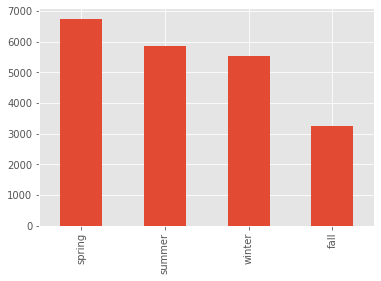

In [6]:
kc.month = kc.month.replace(12, 0) # change 12 to 0 so that 0-2 represent winter
#creating bins for the season
bins = [0, 3, 6, 9, 11]
kc['season'] = pd.cut(kc['month'], bins, include_lowest = True, labels = ["winter", "spring", "summer", "fall"])
kc['season'] = kc['season'].cat.as_unordered()
kc['season'].value_counts().plot(kind='bar')
kc.season

In [7]:
kc = kc.drop(['id', 'date'], axis = 1)
kc.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'tot_bathrooms', 'month', 'season'],
      dtype='object')

## Closer look at each feature especially categorical ones 

By feature elimination the best features are 
'sqft_living', 'grade', 'yr_built', 'lat', 'view', 'bathrooms', 'sqft_living15', 'condition', 'floors', 'waterfront_1', 'zipcode', 'long', 'sqft_lot', 'season_spring', 'bedrooms', 'sqft_basement'

### bar charts with mean price

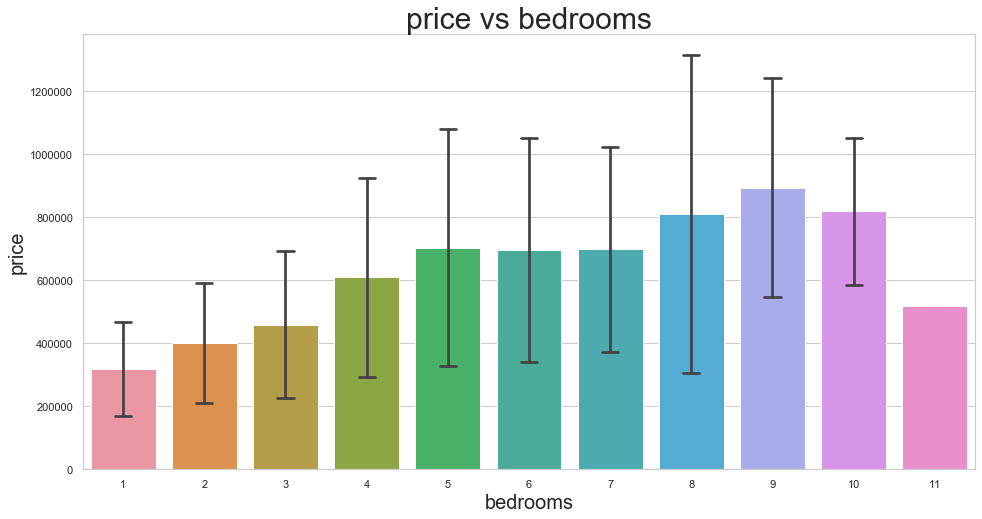

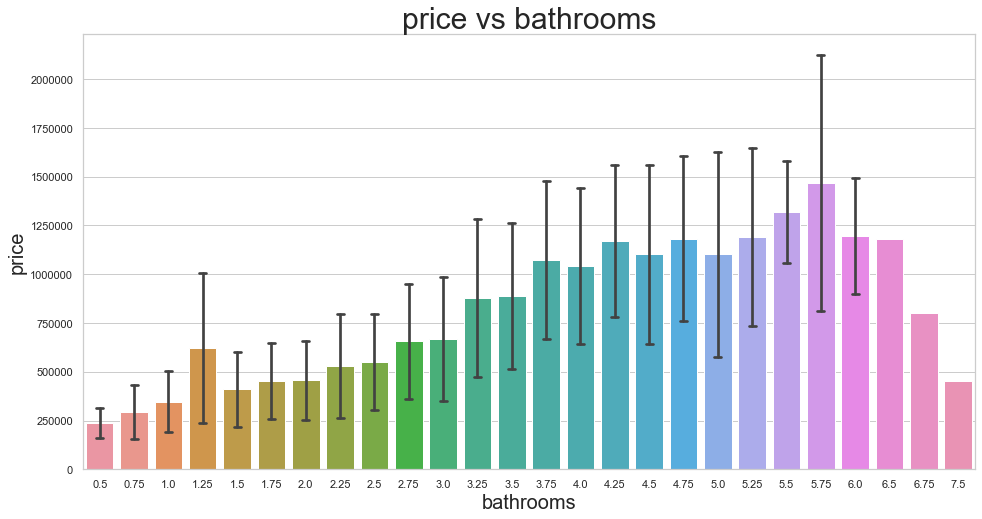

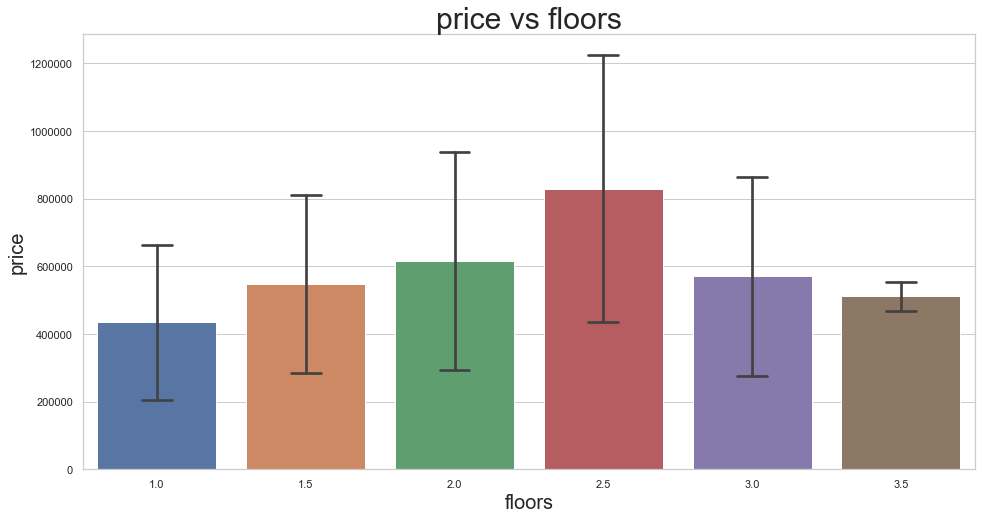

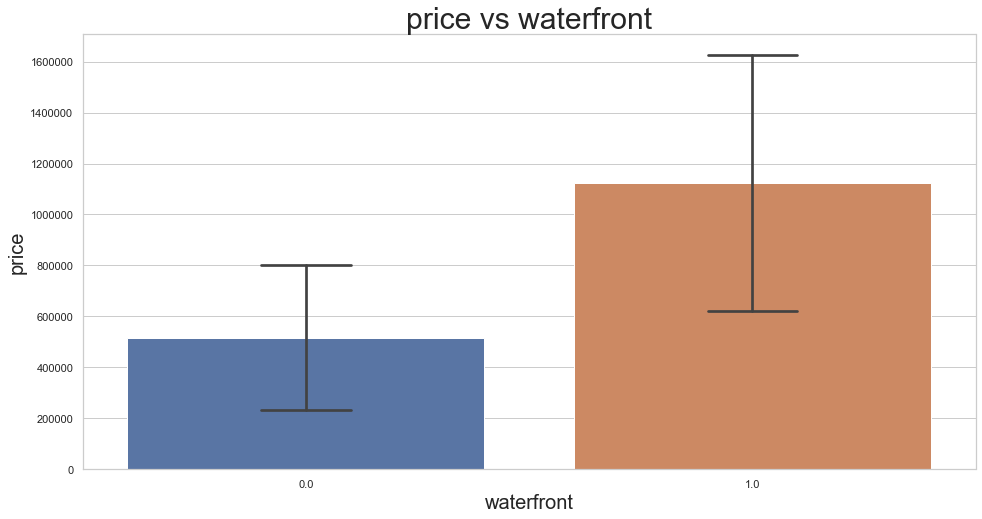

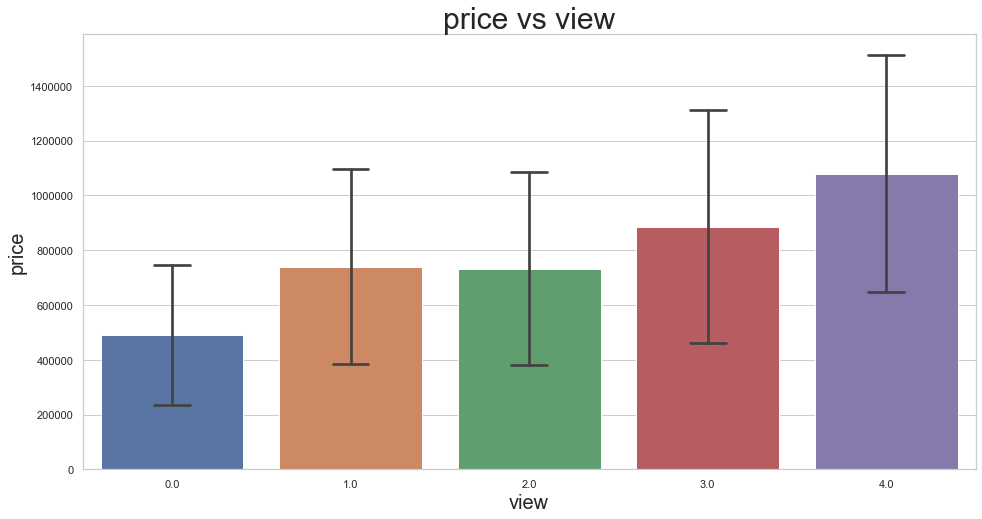

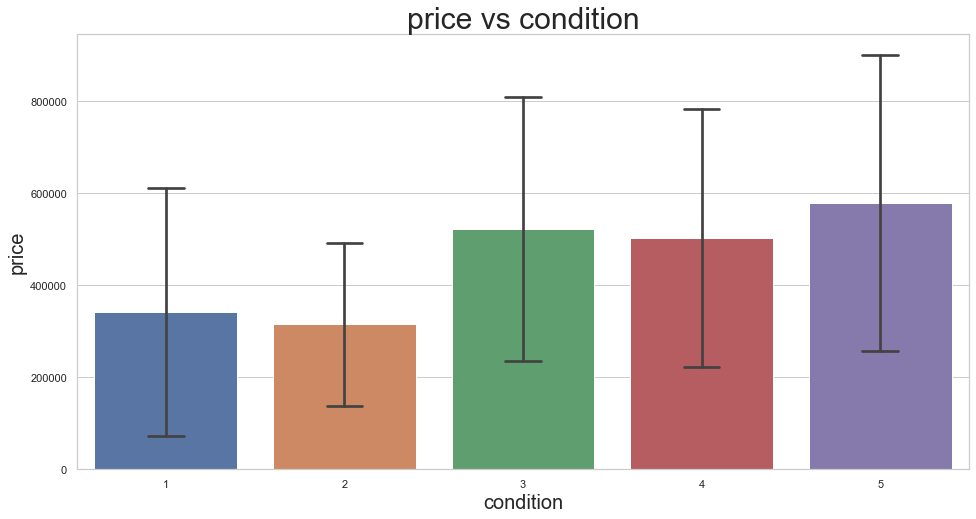

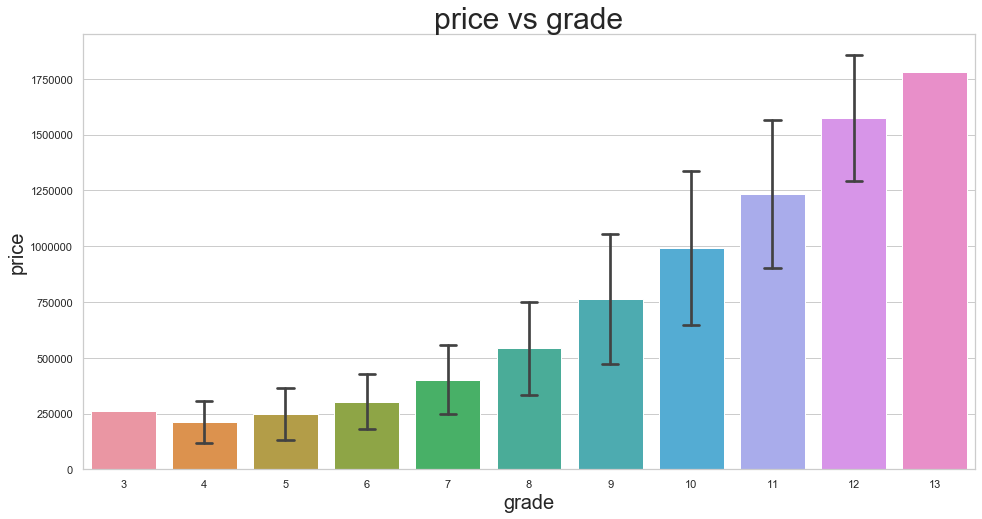

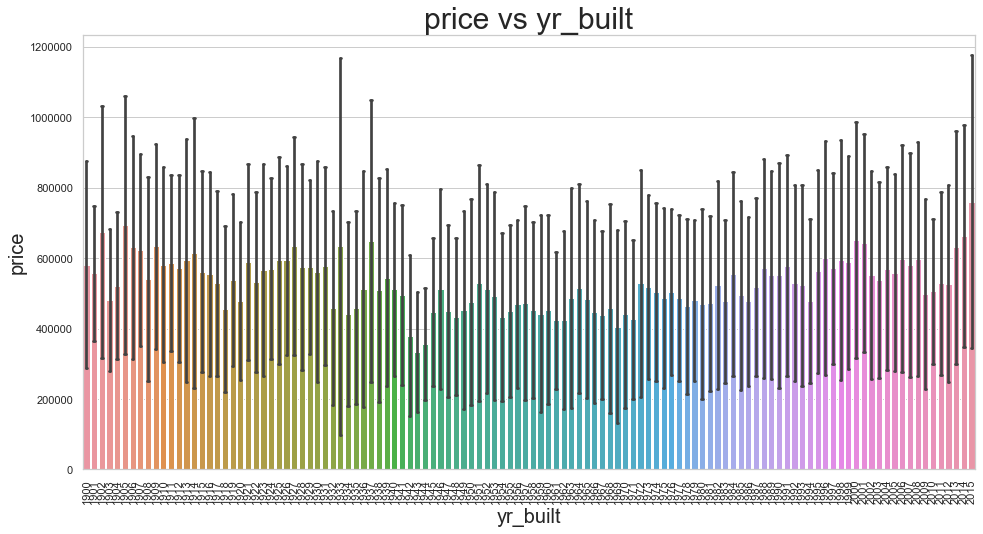

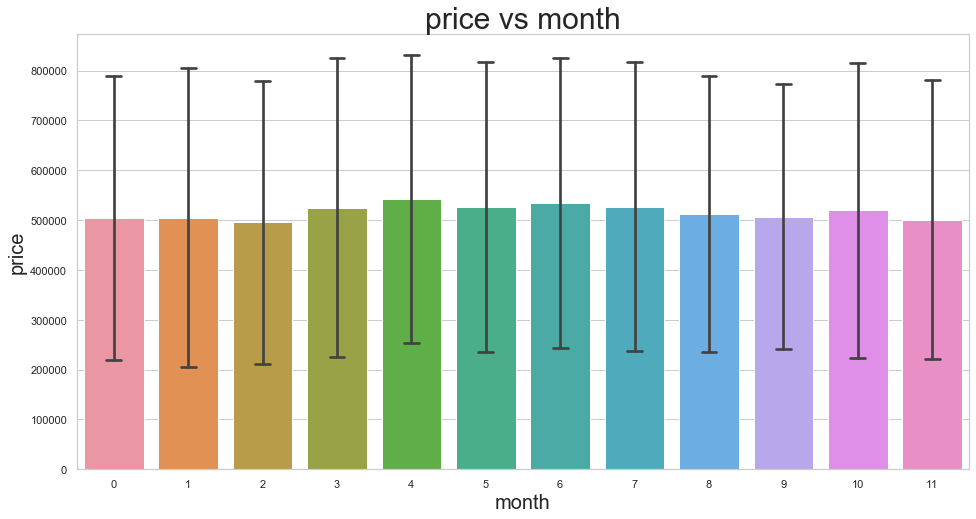

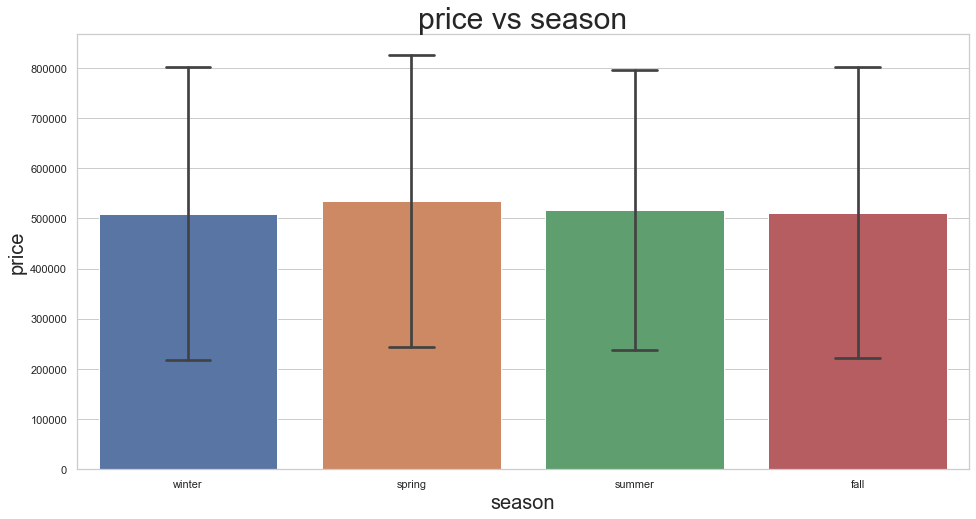

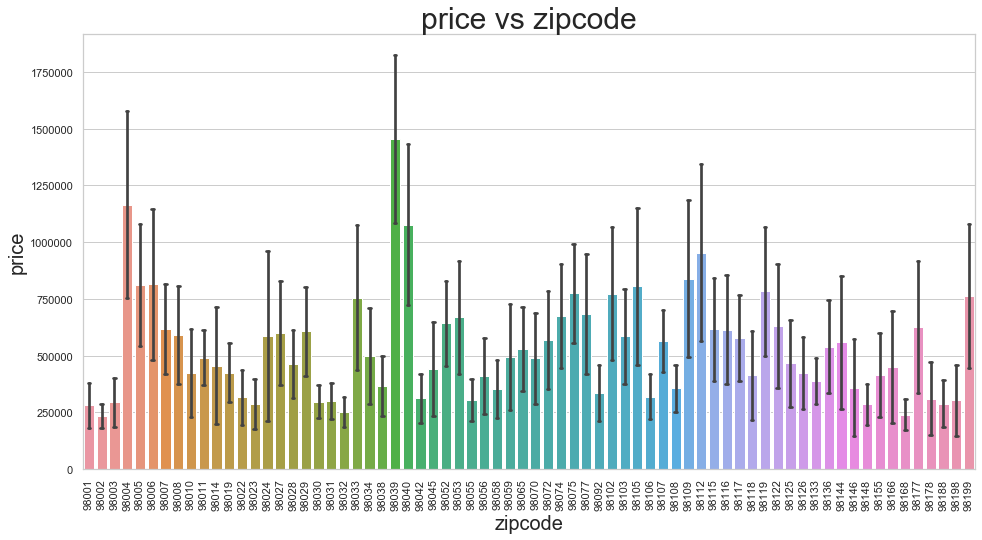

In [8]:
sns.set(style="whitegrid")
#housing = sns.load_dataset("tips")
bar_list=['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'month','season', 'zipcode']

for col in bar_list:
    plt.figure(figsize=(16,8))
    plt.title('price vs '+col,fontsize=30)
    ax = sns.barplot(x=col, y="price", data=kc, ci="sd", capsize=0.2)
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("price", fontsize=20)
    if col == 'zipcode' or col == 'yr_built':
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.savefig('img/'+col+'.png') # Save that figure
    plt.show()
    

### closer look at 'grade'

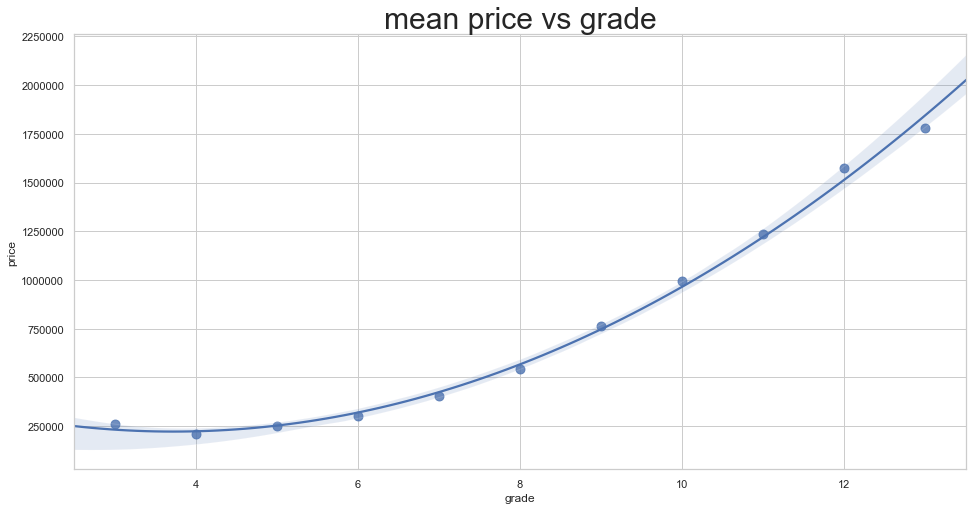

In [9]:
grade = kc[['price', 'grade']]
grade = grade.groupby('grade').aggregate(np.mean)
grade.reset_index(inplace = True)

sns.set(style="whitegrid")
plt.figure(figsize=(16,8))
plt.title('mean price vs grade',fontsize=30)
ax = sns.regplot(x='grade', y="price", data=grade, fit_reg=True, 
                 scatter_kws={"s": 80, "label":'fit'}, 
                 order=2, x_ci=95)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
#ax.legend()
plt.savefig('img/grade_fit.png') # Save figure ./img
plt.show() 

### closer look at 'bedrooms'

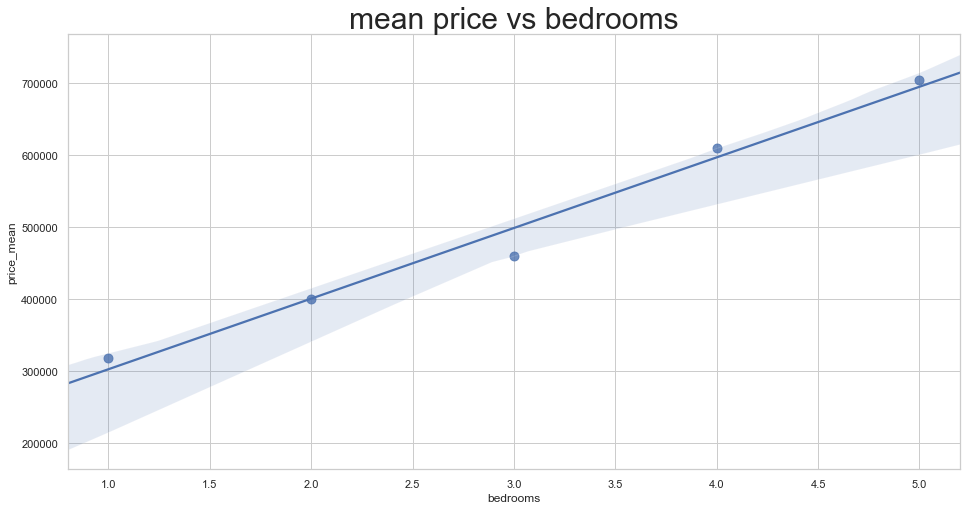

In [10]:
bedrooms = kc[['price', 'bedrooms']]
bedrooms = bedrooms.groupby(['bedrooms'], as_index=False).aggregate({'price': ['mean', 'std']})
#grade.reset_index(inplace = True)
#display(bedrooms.price['std'].head())
bedrooms = pd.concat([bedrooms.bedrooms, bedrooms.price['mean'], bedrooms.price['std']], axis=1)
bedrooms.rename(columns={'mean':'price_mean', 'std':'price_std'}, inplace=True)
#display(bedrooms.head())

bedrooms = bedrooms[bedrooms.bedrooms < 6]

sns.set(style="whitegrid")
plt.figure(figsize=(16,8))
plt.title('mean price vs bedrooms',fontsize=30)
ax = sns.regplot(x='bedrooms', y="price_mean", data=bedrooms, fit_reg=True, 
                 scatter_kws={"s": 80, "label":'fit'}, 
                 order=1, ci=95)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
#ax.legend()
plt.savefig('img/bedrooms_fit.png') # Save that figure
plt.show() 

### closer look at 'floors'

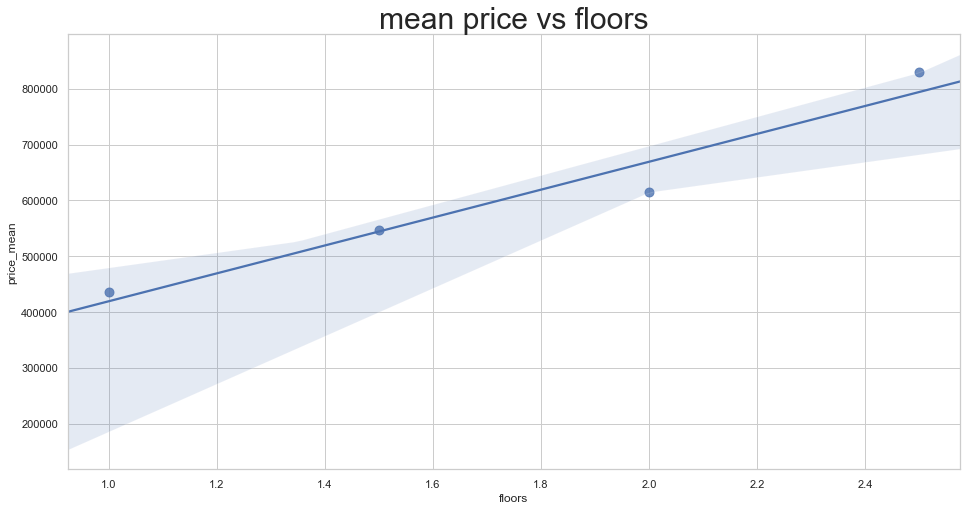

In [11]:
floors = kc[['price', 'floors']]
floors = floors.groupby(['floors'], as_index=False).aggregate({'price': ['mean', 'std']})
#grade.reset_index(inplace = True)
#display(floors.price['std'].head())
floors = pd.concat([floors.floors, floors.price['mean'], floors.price['std']], axis=1)
floors.rename(columns={'mean':'price_mean', 'std':'price_std'}, inplace=True)
#display(floors.head())

floors = floors[floors.floors < 3]

sns.set(style="whitegrid")
plt.figure(figsize=(16,8))
plt.title('mean price vs floors',fontsize=30)
ax = sns.regplot(x='floors', y="price_mean", data=floors, fit_reg=True, 
                 scatter_kws={"s": 80, "label":'fit'}, 
                 order=1, ci=95)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
#ax.legend()
plt.savefig('img/floors_fit.png') # Save that figure
plt.show() 

## Conclusion
* Biggest factors for the current linear regression model are grade, sqft_living, sqft_living15, latitude and bedrooms
* Grade has a 2nd order correlation with mean price
* There’s almost no affect on sale date
* For general houses 1.25 bathrooms/bedroom is the optimal
* Bedrooms correlate linearly up to 5 bedrooms/house 


## Acknoledgement

I would like to thank our instructor Amber for her exceptional teaching and guidance, and Dara for her encouragement. I would like to convay my special thanks to my good friend Prof. Pasan Edirisinghe for his many hourse of explainations of statistics and probability. 